On Iris dataset Supervised Learning

In [1]:
#import libraries
import numpy as np
from numpy import percentile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Read the dataset to the python environment.

In [2]:
df=pd.read_excel('iris.xls')#loading and reading dataset
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# check the rows and columns
df.shape

(150, 5)

In [4]:
#features
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

### 2. Do necessary pre-processing steps.

null values in SL,SW,PL

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()#understadn statistics of dataset

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.nunique()#check for unique values in dataset

SL                35
SW                23
PL                43
PW                22
Classification     3
dtype: int64

In [8]:
df.isna().sum()#check for null values

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
# fill the missing values
df['SL']=df['SL'].fillna(df['SL'].mean())
df['SW']=df['SW'].fillna(df["SW"].mean())
df['PL']=df['PL'].fillna(df['PL'].mean())

In [10]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<Figure size 1224x1224 with 0 Axes>

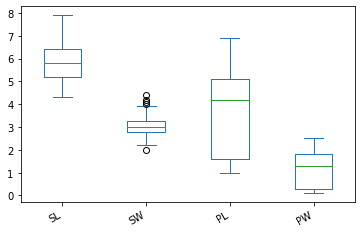

In [11]:
#Check for outliers
plt.figure(figsize=(17,17))
df.plot(kind='box', vert=True)
plt.gcf().autofmt_xdate()

In [12]:
# From the "SW" Box plot we can say that there are few outliers existing. so we've to fix it
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')

In [13]:
print('Q1:',Q1)
print('Q2:',Q2)
print('Q3:',Q3)

Q1: 2.8
Q2: 3.0
Q3: 3.25


In [14]:
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
Up_lim=Q3+(1.5*IQR)
print('lower limit is',low_lim)
print('Upper limit is',Up_lim)

lower limit is 2.1249999999999996
Upper limit is 3.9250000000000003


In [15]:
outlier=[]
for x in df['SW']:
    if(x>Up_lim)or(x<low_lim):
        outlier.append(x)

In [16]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [17]:
ind_val=df[(df['SW']>Up_lim) |(df['SW']<low_lim)]

In [18]:
ind_val.index

Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [19]:
df.drop([14, 15, 32, 33,60],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x12a4214c0>,
 'caps': [<matplotlib.lines.Line2D at 0x12a421be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12a421100>],
 'medians': [<matplotlib.lines.Line2D at 0x12a42c340>],
 'fliers': [<matplotlib.lines.Line2D at 0x12a42c6d0>],
 'means': []}

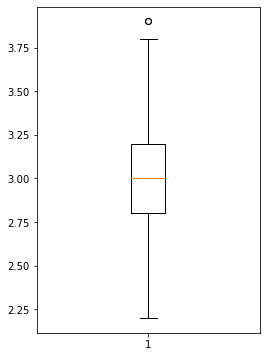

In [20]:
# Boxplot of SW
plt.figure(figsize=(4,6))
plt.boxplot(df['SW'])

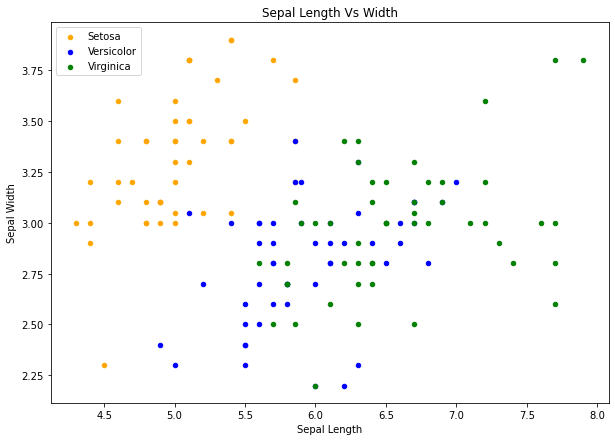

In [21]:
fig = df[df.Classification == 'Iris-setosa'].plot(kind='scatter', x='SL', y='SW', color='orange', label='Setosa')
df[df.Classification == 'Iris-versicolor'].plot(kind='scatter', x='SL', y='SW', color='blue', label='Versicolor', ax=fig)
df[df.Classification == 'Iris-virginica'].plot(kind='scatter', x='SL', y='SW', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

/Users/recruiter/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


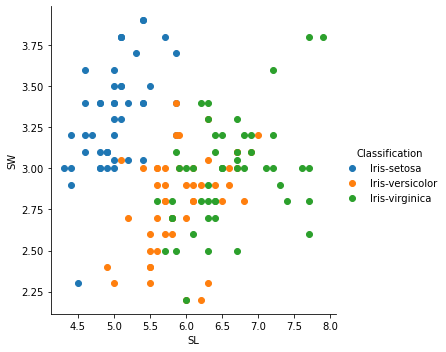

In [22]:
sns.FacetGrid(df, hue='Classification', size=5)\
.map(plt.scatter, 'SL', 'SW')\
.add_legend()

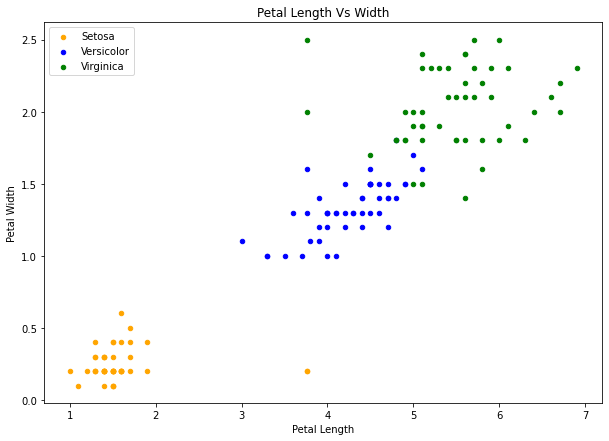

In [23]:
fig = df[df.Classification == 'Iris-setosa'].plot(kind='scatter', x='PL', y='PW', color='orange', label='Setosa')
df[df.Classification == 'Iris-versicolor'].plot(kind='scatter', x='PL', y='PW', color='blue', label='Versicolor', ax=fig)
df[df.Classification == 'Iris-virginica'].plot(kind='scatter', x='PL', y='PW', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

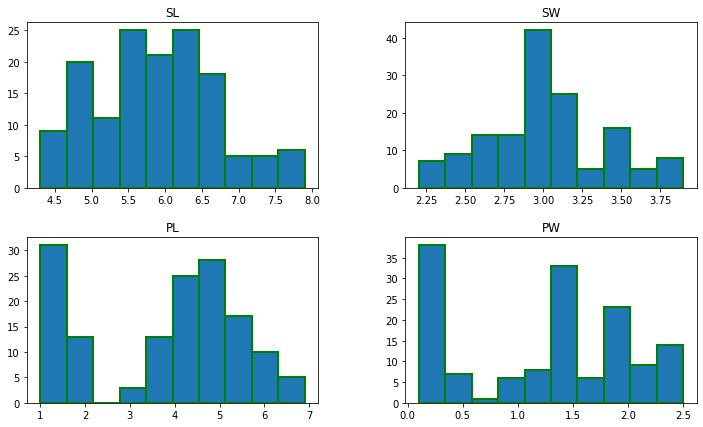

In [26]:
df.hist(edgecolor='green', linewidth=2,grid=False)
fig = plt.gcf()
fig.set_size_inches(12,7)
plt.show()

<Figure size 576x576 with 0 Axes>

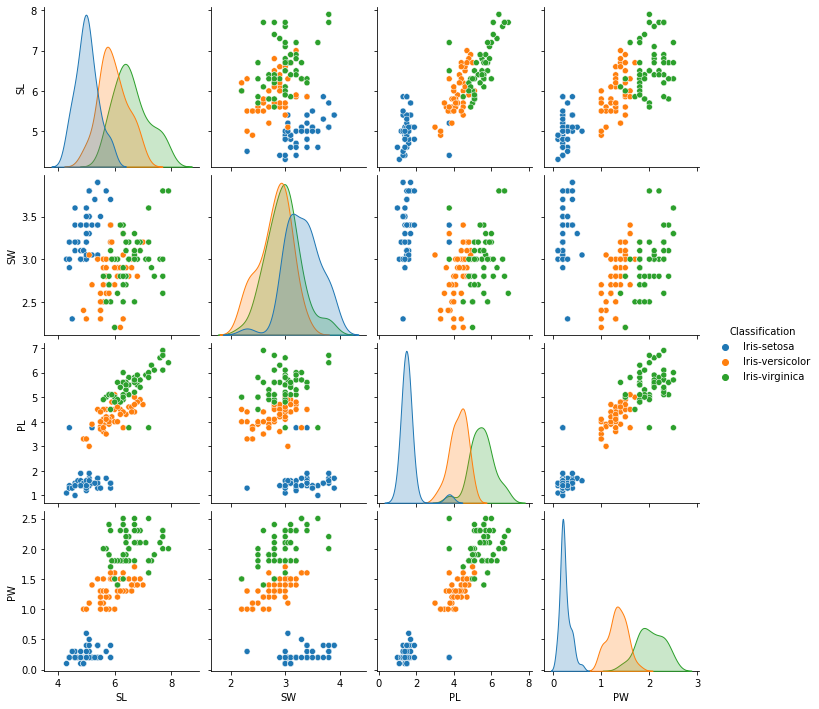

In [27]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df,hue='Classification')
plt.show()

<AxesSubplot:xlabel='Classification', ylabel='PW'>

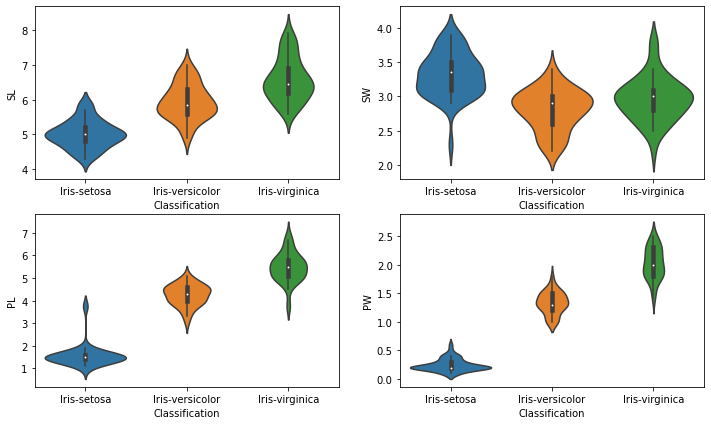

In [28]:
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
sns.violinplot(x='Classification', y = 'SL', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Classification', y = 'SW', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Classification', y = 'PL', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Classification', y = 'PW', data=df)

### 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

The given problem is a classification problem.Therefore classification algorithms can be used to build model.
Classification: Samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

Regression: If the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

Before we start, we need to clear some ML notations.

attributes-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.

Target variable, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.

In [29]:
# Separating the data into dependent and independent variables
X=df.drop(['Classification'],axis=1)
y=df['Classification']

In [30]:
#Perform Label encoding 
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
y=label_en.fit_transform(y)

In [31]:
#Performing Min Max scaling 
from sklearn import preprocessing  
min_max = preprocessing.MinMaxScaler(feature_range =(0,1))
X = min_max.fit_transform(X)

In [32]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.23)

In [33]:
X_train.shape

(111, 4)

### Training the models

#### 1) Logistic Regression

#### 2) K – Nearest Neighbour (KNN)

#### 3) Support Vector Machine (SVM)

#### 4) Decision Trees

#### 5) Random Forest

#### 6) Gradient Boosting

### 1.Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

In [35]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.82      1.00      0.90         9
           2       1.00      0.85      0.92        13

    accuracy                           0.94        34
   macro avg       0.94      0.95      0.94        34
weighted avg       0.95      0.94      0.94        34

[[12  0  0]
 [ 0  9  0]
 [ 0  2 11]]
accuracy is 0.9411764705882353


### 2. K – Nearest Neighbour (KNN)

In [36]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      0.89      0.84         9
           2       0.92      0.85      0.88        13

    accuracy                           0.91        34
   macro avg       0.91      0.91      0.91        34
weighted avg       0.92      0.91      0.91        34

[[12  0  0]
 [ 0  8  1]
 [ 0  2 11]]
accuracy is 0.9117647058823529


/var/folders/fw/436p2dfn0xd6rjpw2r2qw9mw0000gn/T/ipykernel_1394/3384262272.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a = pd.Series()


([<matplotlib.axis.XTick at 0x12b00e8e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

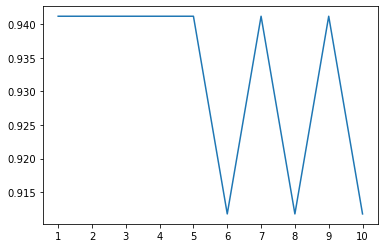

In [37]:
from sklearn import metrics
a_index = list(range(1,11))
a = pd.Series()
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)

### 3.Support Vector Machine (SVM)

In [38]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.89      0.89         9
           2       0.92      0.92      0.92        13

    accuracy                           0.94        34
   macro avg       0.94      0.94      0.94        34
weighted avg       0.94      0.94      0.94        34

[[12  0  0]
 [ 0  8  1]
 [ 0  1 12]]
accuracy is 0.9411764705882353


### 4.Decision Trees

In [39]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      0.89      0.84         9
           2       0.92      0.85      0.88        13

    accuracy                           0.91        34
   macro avg       0.91      0.91      0.91        34
weighted avg       0.92      0.91      0.91        34

[[12  0  0]
 [ 0  8  1]
 [ 0  2 11]]
accuracy is 0.9117647058823529


### 5. Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9411764705882353


### 7.Gradient Boosting

In [46]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
model = gb.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.89      0.89         9
           2       0.92      0.92      0.92        13

    accuracy                           0.94        34
   macro avg       0.94      0.94      0.94        34
weighted avg       0.94      0.94      0.94        34

[[12  0  0]
 [ 0  8  1]
 [ 0  1 12]]
accuracy is 0.9411764705882353


In [47]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
   LogisticRegression(),
    KNeighborsClassifier(n_neighbors = 8,metric = 'minkowski'),
    SVC(kernel='linear'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

LogisticRegression
****Results****
Accuracy: 94.1176%
KNeighborsClassifier
****Results****
Accuracy: 91.1765%
SVC
****Results****
Accuracy: 91.1765%
DecisionTreeClassifier
****Results****
Accuracy: 91.1765%
RandomForestClassifier
****Results****
Accuracy: 94.1176%
GradientBoostingClassifier
****Results****
Accuracy: 94.1176%


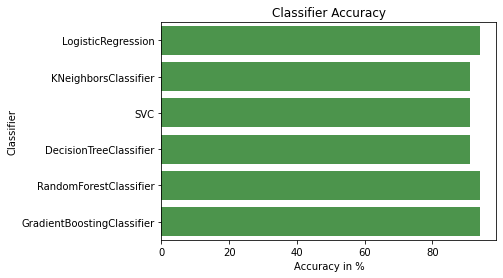

In [48]:
sns.barplot(x='Accuracy', y='Classifier', data=log, color="green",alpha=0.75)

plt.xlabel('Accuracy in %')
plt.title('Classifier Accuracy')
plt.show()

Summary: In this project, we trained our own supervised machine learning model using Iris Flower Classification Project with Machine Learning.

Observations: After the implementing the Linear regression, K – Nearest Neighbour (KNN) , Support Vector Machine (SVM),decision tree and Random forest algorithms from all, logistic regression came out with the best accuracy of prediction so we can use that model for best predictions